In [56]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sqlalchemy import create_engine
from sqlalchemy.engine import URL 
import os
from dotenv import load_dotenv

In [8]:
#connection to postgresql database
load_dotenv('database.env')
DATABASE_URL = os.getenv('DATABASE_URL')
engine = create_engine(DATABASE_URL)

In [9]:
# Loading Data
query = "SELECT * FROM rok25"
df = pd.read_sql(query, engine)


In [19]:
df.head(5)

,wojewodztwo,marka,liczba,miesiac
0,ŁÓDZKIE,DACIA,96,1
1,DOLNOŚLĄSKIE,ALFA ROMEO,53,1
2,DOLNOŚLĄSKIE,ALPINE,1,1
3,DOLNOŚLĄSKIE,ASTON MARTIN,2,1
4,DOLNOŚLĄSKIE,AUDI,646,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   wojewodztwo  2263 non-null   object
 1   marka        2263 non-null   object
 2   liczba       2263 non-null   int64 
 3   miesiac      2263 non-null   object
dtypes: int64(1), object(3)
memory usage: 70.8+ KB


In [22]:
df_regcount = df['liczba'].sum()
df_regcount

227979

In [25]:
df_wojewodztwa = df.pivot_table(values='liczba',index='wojewodztwo',aggfunc='sum').sort_values(by='liczba',ascending=False)
df_wojewodztwa

,liczba
wojewodztwo,
MAZOWIECKIE,44585
WIELKOPOLSKIE,27231
ŚLĄSKIE,22850
MAŁOPOLSKIE,19762
DOLNOŚLĄSKIE,17962
POMORSKIE,13805
ŁÓDZKIE,12386
PODKARPACKIE,10898
KUJAWSKO-POMORSKIE,10893


In [29]:
populacja = {
    'MAZOWIECKIE': 5432000,
    'ŚLĄSKIE': 4320000,
    'WIELKOPOLSKIE': 3500000,
    'MAŁOPOLSKIE': 3400000,
    'DOLNOŚLĄSKIE': 2900000,
    'ŁÓDZKIE': 2400000,
    'POMORSKIE': 2300000,
    'LUBELSKIE': 2100000,
    'PODKARPACKIE': 2100000,
    'KUJAWSKO-POMORSKIE': 2000000,
    'ZACHODNIOPOMORSKIE': 1700000,
    'WARMIŃSKO-MAZURSKIE': 1400000,
    'ŚWIĘTOKRZYSKIE': 1200000,
    'LUBUSKIE': 1000000,
    'PODLASKIE': 1000000,
    'OPOLSKIE': 966000
}

# Dodanie kolumny
df_wojewodztwa['populacja'] = df_wojewodztwa.index.map(populacja)

In [ ]:
#dodanie współczynnika na 1000 mieszkańców
df_wojewodztwa['wspolczynnik'] =  ((df_wojewodztwa['liczba'] / df_wojewodztwa['populacja']) * 1000).round(2)
df_wojewodztwa.sort_values(by='wspolczynnik',ascending=False, inplace=True)
df_wojewodztwa

,liczba,populacja,wspolczynnik
wojewodztwo,,,
MAZOWIECKIE,44585,5432000,8.21
WIELKOPOLSKIE,27231,3500000,7.78
LUBUSKIE,6629,1000000,6.63
DOLNOŚLĄSKIE,17962,2900000,6.19
POMORSKIE,13805,2300000,6.00
MAŁOPOLSKIE,19762,3400000,5.81
PODLASKIE,5564,1000000,5.56
ŚWIĘTOKRZYSKIE,6641,1200000,5.53
KUJAWSKO-POMORSKIE,10893,2000000,5.45


Text(0.5, 1.0, 'Number of registered cars by voivodeship from Jan to Feb 2025')

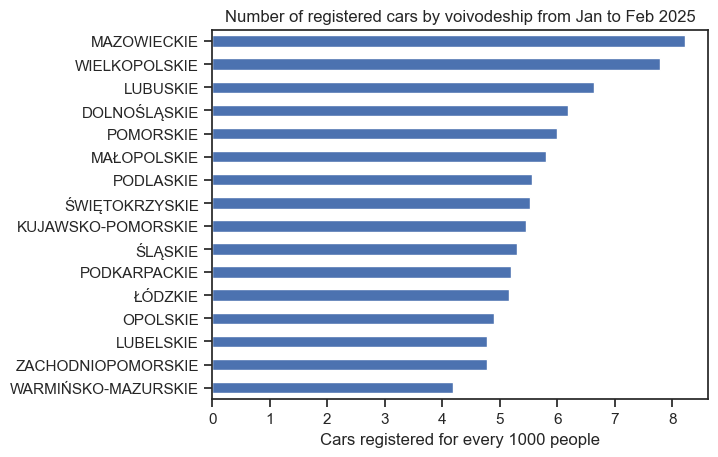

In [93]:
#df_wojewodztwa.sort_values('wspolczynnik', ascending=True)['wspolczynnik'].plot(kind='barh')

df_wojewodztwa.iloc[::-1]['wspolczynnik'].plot(kind='barh')
plt.xlabel('Cars registered for every 1000 people')
plt.ylabel('')
plt.title('Number of registered cars by voivodeship from Jan to Feb 2025')


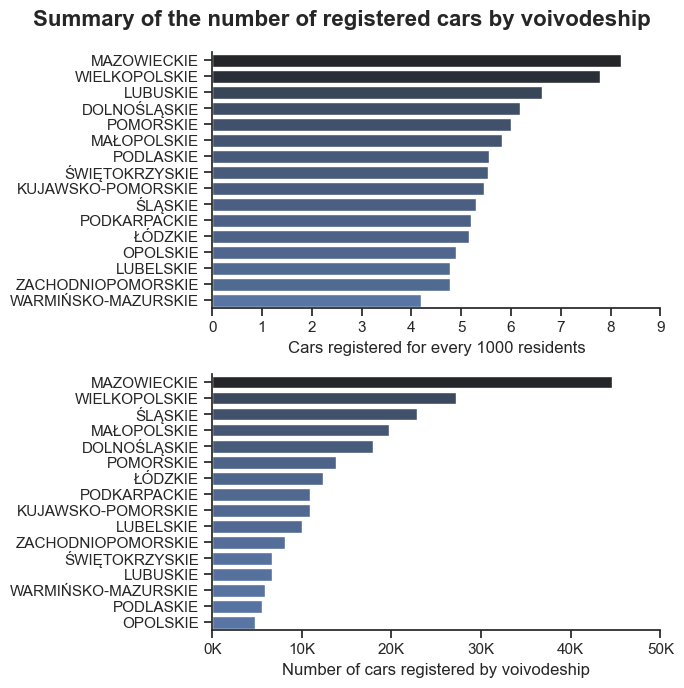

In [129]:
fig, ax = plt.subplots(2, 1,figsize=(7,7))  
sns.set_theme(style='ticks')
fig.suptitle('Summary of the number of registered cars by voivodeship', fontsize=16, fontweight='bold')
# number of cars registrated for every 1000 ppl 

#df_wojewodztwa.iloc[::-1].plot(kind='barh', y='wspolczynnik', ax=ax[0], legend=False) 
sns.barplot(data=df_wojewodztwa, y='wojewodztwo', x='wspolczynnik',hue='wspolczynnik',palette='dark:b_r',dodge=False,ax=ax[0],legend=False)
ax[0].set_title('')
ax[0].set_ylabel('')
ax[0].set_xlabel('Cars registered for every 1000 residents')
ax[0].set_xlim(0,9)
sns.despine()


# number of cars registrated by voivodeship
#df_wojewodztwa.sort_values('liczba', ascending=True).plot(kind='barh', y='liczba', ax=ax[1], legend=False)
sns.barplot(data=df_wojewodztwa.sort_values('liczba', ascending=False), y='wojewodztwo', x='liczba',hue='liczba',palette='dark:b_r',dodge=False,ax=ax[1],legend=False)
ax[1].set_title('')
ax[1].set_ylabel('')
ax[1].set_xlabel('Number of cars registered by voivodeship')
ax[1].set_xlim(0,50000)
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
sns.despine()


plt.tight_layout()
plt.show()